In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


## Load Dataset

HS6 REV. 2007 (2008 - 2017) https://atlas.media.mit.edu/en/resources/data/

In [2]:
data = pd.read_csv("core dataset.csv") #Product Trade by Year and Country (2 digit depth)
data.head()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [3]:
data.tail()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
2875,2875,93.0,2017,9.222621e+09,9.222621e+09,3962.878,1898.071,0.000577,0.000577,ALL
2876,2876,94.0,2017,2.312774e+11,2.312774e+11,791.999,2110.697,0.014466,0.014466,ALL
2877,2877,95.0,2017,1.161837e+11,1.161837e+11,618.152,1091.301,0.007267,0.007267,ALL
2878,2878,96.0,2017,3.202722e+10,3.202722e+10,1802.532,4938.085,0.002003,0.002003,ALL
2879,2879,97.0,2017,1.908515e+10,1.908515e+10,4722.795,870.535,0.001194,0.001194,ALL


In [4]:
del data["Unnamed: 0"]
viet = data.loc[data["country"] == "vietnam"]
viet = viet.reset_index()
indo = data.loc[data["country"] == "indonesia"]
indo = indo.reset_index()
dunia = data.loc[data["country"] == "ALL"]
dunia = dunia.reset_index()
print (viet.shape)
viet.info()

(960, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
index              960 non-null int64
hs07               960 non-null float64
year               960 non-null int64
export_val         960 non-null float64
import_val         960 non-null float64
export_rca         960 non-null float64
import_rca         960 non-null float64
export_val_perc    960 non-null float64
import_val_perc    960 non-null float64
country            960 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 75.1+ KB


In [6]:
viet.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,960,1.0,2008,1.655721e+07,1.116937e+07,4.081860,1.644622,0.000242,0.000146,vietnam
1,961,2.0,2008,6.023379e+07,5.483150e+08,1.473950,8.948563,0.000879,0.007155,vietnam
2,962,3.0,2008,3.823832e+09,3.213780e+08,58.491094,4.515607,0.055833,0.004194,vietnam
3,963,4.0,2008,7.817152e+07,4.092630e+08,10.241673,8.225166,0.001141,0.005340,vietnam
4,964,5.0,2008,1.147554e+07,5.598978e+07,10.733161,14.250828,0.000168,0.000731,vietnam


In [5]:
indo.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [7]:
dunia.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,1920,1.0,2008,1.706110e+10,1.706110e+10,13360.060637,1492.774659,0.001111,0.001111,ALL
1,1921,2.0,2008,9.630627e+10,9.630627e+10,2444.227553,3297.282869,0.006270,0.006270,ALL
2,1922,3.0,2008,7.751119e+10,7.751119e+10,17992.153016,2105.737842,0.005046,0.005046,ALL
3,1923,4.0,2008,7.160095e+10,7.160095e+10,2345.266668,3393.449127,0.004661,0.004661,ALL
4,1924,5.0,2008,7.225888e+09,7.225888e+09,16919.880480,1355.565870,0.000470,0.000470,ALL


## Calculating Intra-Industry Trade

Indonesia as exportir, Vietnam as Importer

In [8]:
indo["export dunia"] = dunia["export_val"]
indo.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,export dunia
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia,1.706110e+10
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia,9.630627e+10
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia,7.751119e+10
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia,7.160095e+10
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia,7.225888e+09


In [22]:
viet["TC"] = ( abs(indo["import_val_perc"] - (viet["export_val"]/dunia["export_val"])) / 2)
viet.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,TC
0,960,1.0,2008,1.655721e+07,1.116937e+07,4.081860,1.644622,0.000242,0.000146,vietnam,0.001333
1,961,2.0,2008,6.023379e+07,5.483150e+08,1.473950,8.948563,0.000879,0.007155,vietnam,0.000897
2,962,3.0,2008,3.823832e+09,3.213780e+08,58.491094,4.515607,0.055833,0.004194,vietnam,0.024165
3,963,4.0,2008,7.817152e+07,4.092630e+08,10.241673,8.225166,0.001141,0.005340,vietnam,0.003809
4,964,5.0,2008,1.147554e+07,5.598978e+07,10.733161,14.250828,0.000168,0.000731,vietnam,0.000543


In [23]:
index = viet.groupby("year")["TC"].sum()

## Plot Trend HH Index over time

In [24]:
index

year
2008    0.686511
2009    0.706619
2010    0.730782
2011    0.733578
2012    0.746103
2013    0.801602
2014    0.844417
2015    0.845891
2016    0.885597
2017    0.884973
Name: TC, dtype: float64

No handles with labels found to put in legend.


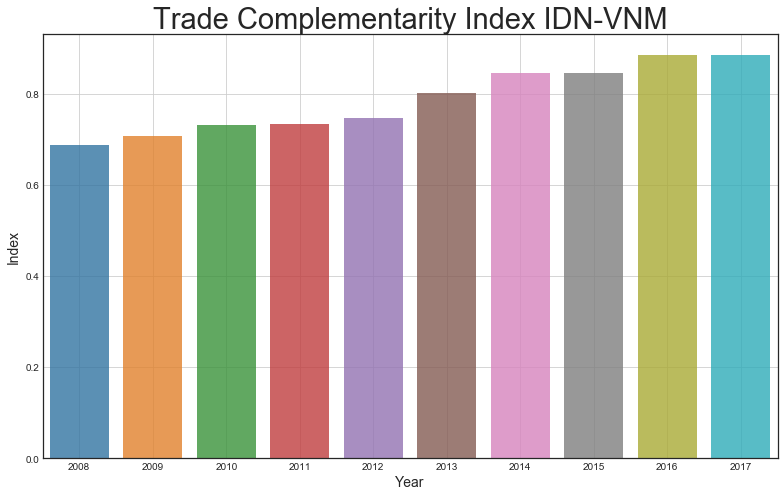

In [33]:
plt.figure(figsize=(11,7))
sns.barplot(index.index, index, alpha=0.8)
plt.title("Trade Complementarity Index IDN-VNM" , size=24)
plt.style.use('seaborn-white')
plt.grid(True)
plt.ylabel("Index", size= 14)
plt.xlabel("Year", size=14)
plt.tight_layout()
plt.savefig("TC.png")
plt.show()